# PlanetGram Tutorial

This tutorial will explain how to process images in Python, to share on the hottest new social media platform for scientific developers, _PlanetGram_.

**In this guide, we will perform the following:**
1. Load a full-color image into a NumPy array
1. Display the image
1. Crop the image
1. Create a lower resolution thumbnail
1. Apply a color map
1. Apply my secret image effect 😎
1. Write an image to disk

## Requirements
* Python 3+
* [matplotlib](https://matplotlib.org/)
* [NumPy](https://numpy.org/)
* [PIL](https://pypi.org/project/Pillow/)

## Step 1. Load a full-color image into a NumPy array
There is a cool free-use image of a [Red Eyed Tree Frog from Wikipedia](https://en.wikipedia.org/wiki/File:Red_eyed_tree_frog_edit2.jpg) in the `data/` directory. 

Let's load that image into memory as a NumPy array using the PIL library. 

In [1]:
from PIL import Image
import numpy as np 

frog_image = Image.open('data/red_eyed_tree_frog.jpg')

frog_raster = np.array(frog_image)

## Step 2. Display the Image

We can use matplotlib's pyplot module to display an image, with the image name and resolution as the title. 

The resolution of our image can be found using [numpy.ndarray.shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html).

Let's also define some functions, `display_image`, and `make_caption` so that we don't have to repeat ourselves in later steps.


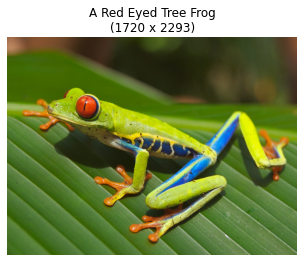

In [2]:
from typing import List
from matplotlib import pyplot as plt


"""Display an image in a new pyplot plot"""
def display_image(raster: np.ndarray, caption: str, hide_axis: bool = True): 
    plt.figure()  
    plt.title(caption)
    if hide_axis:
        plt.axis('off')
    plt.imshow(raster)    
    
"""Return a caption with the resolution of the image on the next line"""
def make_caption(caption: str, shape: List) -> str:
    return f'{caption}\n({shape[0]} x {shape[1]})'
    
display_image(
    frog_raster,
    make_caption('A Red Eyed Tree Frog', frog_raster.shape)
)

## Step 3. Crop The Image

Look at those big red eyes 👀! Let's crop the image into a square that focuses on this colorful frogs head. 

To do this, we'll use a PIL function [Image.crop](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop). 

The first parameter is `box - a 4-tuple defining the left, upper, right, and lower pixel coordinate.`. 

Hmm, we need to find out roughly where this box is. Let's call that function we wrote `display_image` with the `hide_axis` as `False`, which will display the pixel dimensions as the X and Y axis. 

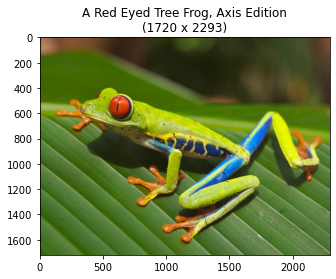

In [3]:
display_image(
    frog_raster,
    make_caption('A Red Eyed Tree Frog, Axis Edition', frog_raster.shape), 
    hide_axis=False
)

Great! Let's make a square with a side length of 800 pixels, starting at coord indates (200, 1000), and ending at (1000, 200).

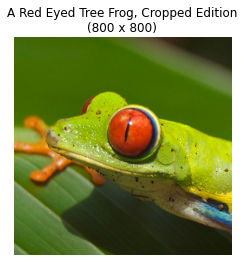

In [4]:
side_length = 800  # pixels

left = 200
right = left + side_length

lower = 1000
upper = lower - side_length

box = [left, upper, right, lower]

cropped_frog_file = frog_image.crop(box)
cropped_frog_raster = np.array(cropped_frog_file)

display_image(
    cropped_frog_raster,
    make_caption('A Red Eyed Tree Frog, Cropped Edition', cropped_frog_raster.shape), 
)

That's a nice head (and eyes)!

## Step 4. Create a Lower Resolution Thumbnail
Since this image is going to be used on the web, let's scale it down into a thumbnail. 

To do this, we'll use the PIL function [Image.resize](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize). 

Let's reduce the height and width of the original image by 50%. 

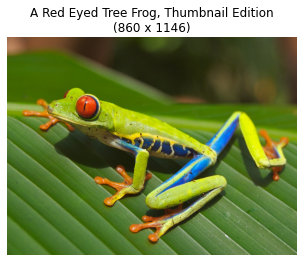

In [5]:
# The new dimensions are 50% of the original. 
new_shape = np.divide(frog_raster.shape, 2)

# Partial (float) pixel dimensions are invalid. 
new_shape = new_shape.astype(int)  

new_height, new_width, _ = new_shape

thumbnail_frog_image = frog_image.resize((new_width, new_height))
thumbnail_frog_raster = np.array(thumbnail_frog_image)

display_image(
    thumbnail_frog_raster,
    make_caption('A Red Eyed Tree Frog, Thumbnail Edition', thumbnail_frog_raster.shape), 
)

## Step 5. Apply a Color Map 
This frog is pretty colorful, but let's turn up the _turbo_ on it. 

Let's apply a color map called 'turbo' using ColorMap from the [matplotlib.cm](https://matplotlib.org/stable/api/cm_api.html) module. 

If we look at the documentation of [ColorMap](https://github.com/matplotlib/matplotlib/blob/75c425c425d5d4914133cb935a3419e2ad1b6116/lib/matplotlib/colors.py#L570), it tells us ... 


```
Typically, Colormap instances are used to convert data values (floats)
from the interval ``[0, 1]`` to the RGBA color that the respective
Colormap represents.
```

We can save a lot of work converting RGB tuples between acceptable formats by starting with a greyscale image. We can do this by loading the image and using the PIL function [Image.convert( ... , mode='L')](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert). 

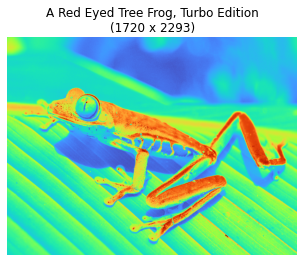

In [6]:
from matplotlib import pyplot as plt

# https://matplotlib.org/stable/gallery/color/colormap_reference.html
color_map = plt.cm.get_cmap('turbo')  

# https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes
greyscale_frog_image = frog_image.convert('L')  

turbo_frog_image = color_map(greyscale_frog_image)
turbo_frog_raster = np.array(turbo_frog_image)

display_image(
    turbo_frog_raster, 
    make_caption('A Red Eyed Tree Frog, Turbo Edition', turbo_frog_raster.shape)
)

## Step 6. Apply an Image Mask
Let's pay homage to the Red Eyed Tree Frog's [natural habitat](https://en.wikipedia.org/wiki/Agalychnis_callidryas#Distribution_and_habitat), the country of Colombia, by displaying our image of the frog within the border of Colombia. We can do this with boolean masks, and NumPy.

A boolean mask is an image the same size as another image, composed only of the values 0 or 1. 

If we apply a mask to said image, only pixels where the mask has a value of 1 will be shown. 

Simply, we are doing something like this ...
```
> a = [55, 35, 89, 99]
> b = [ 0,  1,  1,  0]
> a[b]
... [0, 35, 89, 0]
```

There is a free-use of a [Map of Colombia from Wikipedia](https://commons.wikimedia.org/wiki/File:Colombia_locator_map.svg) in the `data/` directory, let's use that. 

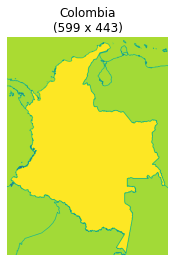

In [7]:
colombia_image = Image.open('data/colombia.svg')
colombia_image = colombia_image.convert('L')  

colombia_raster = np.array(colombia_image)

display_image(
    colombia_raster,
    make_caption('Colombia', colombia_raster.shape)
)

Colombia is the yellow part.

Let's create a mask where 1 will represent yellow, and 0 will represent any other color. 

To do this, we need to know what value 'yellow' really is. This value can be found at the middle of the image.

In [8]:
height, width = colombia_raster.shape

yellow_pixel_value = colombia_raster[height//2][width//2]

print(f'The yellow value is: "{yellow_pixel_value}"')

The yellow value is: "252"


So then, our mask can be created as follows using NumPy's excellent array functionality ... 

In [9]:
mask = colombia_raster == yellow_pixel_value

print(mask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


We'll need to resize our frog image to use it with this mask. 

In [10]:
colombia_frog_image = frog_image.convert('L')

colombia_height, colombia_width = colombia_raster.shape

resized_colombia_frog_image = colombia_frog_image.resize(
    (colombia_width, colombia_height)
)

Now we can _apply_ the mask to our image. Wa-la!

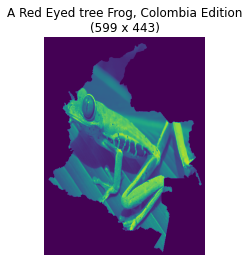

In [11]:
resized_colombia_frog_raster = np.array(resized_colombia_frog_image)
resized_colombia_frog_raster[~mask] = 0

display_image(
    resized_colombia_frog_raster, 
    make_caption(
        'A Red Eyed tree Frog, Colombia Edition', 
        resized_colombia_frog_raster.shape
    )
)

## Step 7. Write an Image to Disk

Finally, let's write 'colombia frog' to the `/output` directory, as 'colombia_frog.png'.

To do this, we'll use a PIL function [Image.save](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.save). 

But first, we need to convert our masked array back into an Image object. 

In [12]:
resized_colombia_frog_image = Image.fromarray(resized_colombia_frog_raster)
resized_colombia_frog_image.save('output/colombia_frog.png')

## Conclusion 
Great Job! You've just learned how to display, crop, resize, mask, color map, and save images using Python and some well-known libraries.  

You are on your way to becoming PlanetGram's newest power poster! 😎